In [1]:
import numpy as np
import pandas as pd
from pandas import concat
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import math
from math import log
from math import sqrt
import time

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
# load dataset, izolate GOOGL stocks, transform date
df = pd.read_csv("prices-split-adjusted.csv", parse_dates=True)

df['date'] = pd.to_datetime(df["date"])
df.set_index(df["date"], inplace=True)

df = df[df['symbol'] == "GOOGL"]
df.drop(['symbol'],1,inplace=True)

In [3]:
# preprocess data and difference them
# normalize to  range -1 > 1
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
df['open'] = min_max_scaler.fit_transform(df['open'].values.reshape(-1,1))
df['volume'] = min_max_scaler.fit_transform(df['volume'].values.reshape(-1,1))
df['high'] = min_max_scaler.fit_transform(df['high'].values.reshape(-1,1))
df['low'] = min_max_scaler.fit_transform(df['low'].values.reshape(-1,1))
df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
ts = df['close']
ts = np.diff(ts)
ts= np.array(ts)

/root/venv/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


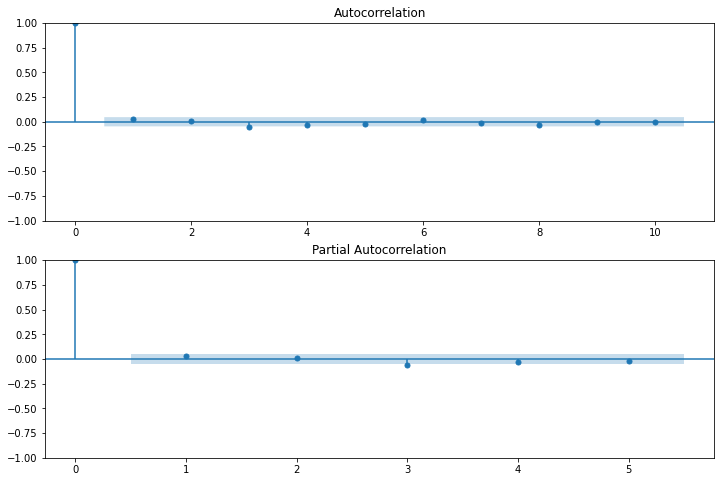

In [4]:
# show ACF and PACF function plots to guess p ARIMA parameter
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=5, ax=ax2)

In [5]:
size = int(len(ts) * 0.80)
train, test = ts[0:size], ts[size:len(ts)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.000460, expected=-0.004049
predicted=0.000714, expected=0.087969
predicted=0.002359, expected=0.003790
predicted=0.000916, expected=-0.016065
predicted=0.000560, expected=0.009263
predicted=0.001002, expected=0.015353
predicted=0.001119, expected=-0.017425
predicted=0.000549, expected=0.017199
predicted=0.001134, expected=-0.047159
predicted=0.000111, expected=-0.114820
predicted=-0.002007, expected=-0.083953
predicted=-0.002582, expected=-0.018268
predicted=-0.000092, expected=0.153105
predicted=0.006307, expected=0.026624
predicted=0.001860, expected=-0.026786
predicted=-0.000311, expected=-0.038446
predicted=-0.000862, expected=-0.059143
predicted=-0.001961, expected=0.049718
predicted=0.002716, expected=-0.025458
predicted=-0.000267, expected=-0.026203
/root/venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=-0.000340, expected=0.048325


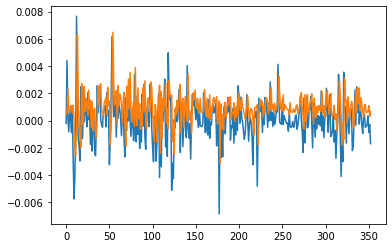

In [6]:
# show graph comaping predictions and real value
# real values are so high, so I needed to lower them by /20
plt.plot(test/20)
plt.plot(predictions)
plt.show()

In [7]:
# print scorers
test_array, pre_array = np.array(test), np.array(predictions)
print(np.mean(np.square(test_array - pre_array)))
print(np.mean(np.abs(test_array - pre_array)))
print(r2_score(test, predictions))

0.0011110815985815412
0.02421066147183354
-0.00027280233192716885


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f2e7851-1c28-4657-b63a-600b5468838e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>